In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option("mode.chained_assignment", None)

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor

In [6]:
## Get Data

In [7]:
dataset = pd.read_csv('UtilTRNS.csv')

In [8]:
dataset.head()

,Time,sCPU,cCost,sFreq,bCPU,bUtil,bFreq,Mem,mCost,mFreq,GPU,gCost,gFreq
0,1.700423e+09,sCPU,0,1400000,bCPU,0,2000000,Mem,0,825000000,GPU,0,600000000
1,1.700423e+09,sCPU,30,1400000,bCPU,0,2000000,Mem,1,825000000,GPU,0,600000000
2,1.700423e+09,sCPU,32,1400000,bCPU,0,2000000,Mem,0,825000000,GPU,0,600000000
3,1.700423e+09,sCPU,25,1400000,bCPU,0,2000000,Mem,1,825000000,GPU,0,600000000
4,1.700423e+09,sCPU,70,1400000,bCPU,0,2000000,Mem,3,825000000,GPU,0,600000000


<Axes: >

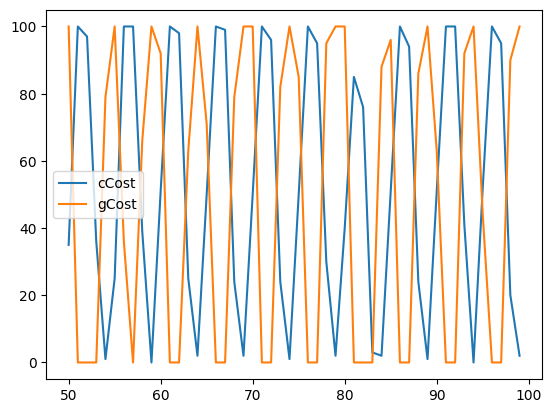

In [6]:
new_data = dataset[['cCost','mCost','gCost']]
new_data[['cCost','gCost']].iloc[50:100].plot()

In [7]:
new_data['shifted_cCost_1'] = new_data['cCost'].shift(1)
new_data['shifted_mCost_1'] = new_data['mCost'].shift(1)
new_data['shifted_gCost_1'] = new_data['gCost'].shift(1)
new_data['shifted_cCost_2'] = new_data['cCost'].shift(2)
new_data['shifted_mCost_2'] = new_data['mCost'].shift(2)
new_data['shifted_gCost_2'] = new_data['gCost'].shift(2)
new_data['Cost'] = dataset['sFreq']/1400000

In [8]:
new_data = new_data.dropna()
new_data

,cCost,mCost,gCost,shifted_cCost_1,shifted_mCost_1,shifted_gCost_1,shifted_cCost_2,shifted_mCost_2,shifted_gCost_2,Cost
2,32,0,0,30.0,1.0,0.0,0.0,0.0,0.0,1.0
3,25,1,0,32.0,0.0,0.0,30.0,1.0,0.0,1.0
4,70,3,0,25.0,1.0,0.0,32.0,0.0,0.0,1.0
5,100,2,0,70.0,3.0,0.0,25.0,1.0,0.0,1.0
6,100,5,0,100.0,2.0,0.0,70.0,3.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
1492,5,3,0,57.0,6.0,0.0,57.0,4.0,0.0,1.0
1493,18,1,0,5.0,3.0,0.0,57.0,6.0,0.0,1.0
1494,1,0,0,18.0,1.0,0.0,5.0,3.0,0.0,1.0
1495,1,0,0,1.0,0.0,0.0,18.0,1.0,0.0,1.0


In [9]:
Y = new_data.iloc[:,0:3]
X = new_data.iloc[:,3:11]
X

,shifted_cCost_1,shifted_mCost_1,shifted_gCost_1,shifted_cCost_2,shifted_mCost_2,shifted_gCost_2,Cost
2,30.0,1.0,0.0,0.0,0.0,0.0,1.0
3,32.0,0.0,0.0,30.0,1.0,0.0,1.0
4,25.0,1.0,0.0,32.0,0.0,0.0,1.0
5,70.0,3.0,0.0,25.0,1.0,0.0,1.0
6,100.0,2.0,0.0,70.0,3.0,0.0,1.0
...,...,...,...,...,...,...,...
1492,57.0,6.0,0.0,57.0,4.0,0.0,1.0
1493,5.0,3.0,0.0,57.0,6.0,0.0,1.0
1494,18.0,1.0,0.0,5.0,3.0,0.0,1.0
1495,1.0,0.0,0.0,18.0,1.0,0.0,1.0


In [10]:
# X = new_data.iloc[1:1496]

In [11]:
X

,shifted_cCost_1,shifted_mCost_1,shifted_gCost_1,shifted_cCost_2,shifted_mCost_2,shifted_gCost_2,Cost
2,30.0,1.0,0.0,0.0,0.0,0.0,1.0
3,32.0,0.0,0.0,30.0,1.0,0.0,1.0
4,25.0,1.0,0.0,32.0,0.0,0.0,1.0
5,70.0,3.0,0.0,25.0,1.0,0.0,1.0
6,100.0,2.0,0.0,70.0,3.0,0.0,1.0
...,...,...,...,...,...,...,...
1492,57.0,6.0,0.0,57.0,4.0,0.0,1.0
1493,5.0,3.0,0.0,57.0,6.0,0.0,1.0
1494,18.0,1.0,0.0,5.0,3.0,0.0,1.0
1495,1.0,0.0,0.0,18.0,1.0,0.0,1.0


In [12]:
Y_val = Y.iloc[:,0:3].values.reshape(-1,3)
Y_val 

array([[32,  0,  0],
       [25,  1,  0],
       [70,  3,  0],
       ...,
       [ 1,  0,  0],
       [ 1,  0,  0],
       [21,  0,  0]])

In [13]:
X_val = X.values.reshape(-1,7)
X_val

array([[30.,  1.,  0., ...,  0.,  0.,  1.],
       [32.,  0.,  0., ...,  1.,  0.,  1.],
       [25.,  1.,  0., ...,  0.,  0.,  1.],
       ...,
       [18.,  1.,  0., ...,  3.,  0.,  1.],
       [ 1.,  0.,  0., ...,  1.,  0.,  1.],
       [ 1.,  0.,  0., ...,  0.,  0.,  1.]])

In [14]:
X_val.shape

(1495, 7)

In [15]:
regressor = MultiOutputRegressor(SVR(kernel='rbf', C=1e3,gamma=0.1)).fit(X_val[:1000], Y_val[:1000])

In [16]:
# regressor.fit(X_val[:1000], Y_val[:1000])

In [17]:
Y_pred = regressor.predict(X_val[1001:1003])

In [18]:
Y_pred

array([[49.99970428,  9.23147926, 48.83780455],
       [49.99915046,  9.23154126, 48.83970254]])

In [19]:
regressor.score(X_val[:1000], Y_val[:1000])

0.9794849126671775

In [20]:
regressor.score(X_val[1000:], Y_val[1000:])

0.20570641324572458

In [21]:
# Y_val[1001:1003]
Y_val[1001:1003]

array([[  1,   8,  68],
       [ 33,  10, 100]])

In [22]:
from sklearn.svm import LinearSVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_regression


In [23]:
regr = MultiOutputRegressor( LinearSVR(dual="auto", random_state=0, tol=1e-5,loss='squared_epsilon_insensitive'))

In [24]:
regr.fit(X_val[:1000], Y_val[:1000])

MultiOutputRegressor(estimator=LinearSVR(dual='auto',
                                         loss='squared_epsilon_insensitive',
                                         random_state=0, tol=1e-05))

In [25]:
Y_out = regr.predict(X_val[1001:1003])

In [26]:
Y_out

array([[71.83594197,  8.78999989, 43.4447174 ],
       [28.08524501,  6.26536429, 68.91332425]])

In [27]:
regr.score(X_val[:1000], Y_val[:1000])

0.4929777393954076

In [28]:
Y_val[1001:1003]

array([[  1,   8,  68],
       [ 33,  10, 100]])

## Testing OutValues

In [10]:
def diffCorr(x,y):
    from scipy import stats
    print("Pearson",stats.pearsonr(x,y))
    print("Spearman",stats.spearmanr(x,y))

In [15]:
x1 = dataset['cCost'].to_numpy()
x2 = dataset['gCost'].to_numpy()
diffCorr(x1,x2)

Pearson PearsonRResult(statistic=-0.5715154276570222, pvalue=1.5019904463563844e-130)
Spearman SignificanceResult(statistic=-0.5561095832484664, pvalue=2.866888378910677e-122)


In [16]:
x1 = dataset['cCost'].to_numpy()
x2 = dataset['mCost'].to_numpy()
diffCorr(x1,x2)

Pearson PearsonRResult(statistic=-0.050614543407912285, pvalue=0.05023579616934131)
Spearman SignificanceResult(statistic=-0.09422099990522352, pvalue=0.0002616374768942044)


In [17]:
x1 = dataset['mCost'].to_numpy()
x2 = dataset['gCost'].to_numpy()
diffCorr(x1,x2)

Pearson PearsonRResult(statistic=-0.24840733997445716, pvalue=1.7312638870690972e-22)
Spearman SignificanceResult(statistic=-0.2821936400942703, pvalue=8.346355566489523e-29)


## Idea for building the FIS model

 We collect the data for big-LITTLE core utilization and frequency, the memory at ondemand and the GPU util. I plan on setting all the values at 250 ms. So that it is in-tandem with what we decided. 

 Now the next steps are as follows :- 
 1. Sanity check -- check the correaltion of the utilization and the cost among all the three/four values
 2. Modeling -- build a conditional probability model for the likelihood of the others value; for eg in cluster 1 -- what is the likely value of say the CPU util when others are fuzzified
 3. The build a fuzzy arma model, using the weights and the linear regr value
 4. Then use predicition using that model --
 5. And finally predict the CPU usage say based on each cluster-- or sort of defuzzification
    

In [ ]:
# Get the data